### Estatística descritiva - introdução
  
Usando:  
  - Pandas
  - Numpy
  - Matplotlib e Seaborn

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### O que é média?

Vamos supor que temos:

sequencia = {x1, x2, x3 .... xn}

<font size="5">\<x> = E[x] = media de x = $\frac{\sum_{i=1}^n{x_i}}{n}$</font>

### media de X = valor esperado de X

media = soma de todos os elementos dividido pelo número de elementos

normalmente se utiliza
  - X (maiúsculo) para a lista, série de dados
  - x (minúsculo) para um determinado (particular) dado

### O que é desvio padrão populacional?
   Dado que conheço uma população, dada uma medida, qual a sua dispersão.

### O que é desvio padrão (amostral)?
   É a dispersão de uma medida dada uma amostra.
   Importante, que se você fizer **3 experimentos distintos**, você vai gerar 3 desvios padrões distintos e obviamente 3 medias distintas.
   A isto se chama replicata biológica (3 experimentos: triplicata)

### O que influência o número amostral?

Dado que conheço uma amostra (n amostral << Npop)  
  - Um n amostral:
    - pequeno (N < 30): gera erros ao estimar a media e o desvio padrão
    - grande  (30 >= N >= 100): minimiza estes erros
    - muito grande (N >> 30): valores esperados (media e desvio padrão) muito próxima "da realidade" (população)


<font size="5">Var[X] \= variança de x \= $\frac{\sum_{i=1}^n{ (x_i - <x>)^2 }}{n}$</font>

<font size="5">SD[X] = SQRT(Var[X])</font>

#### Por que desvio padrão é a soma das diferenças entre cada valor e a média ao quadrado?

In [2]:
x = [2, 5, 17, 9, 11, 15, 8, 23]

# posso utilizar numpy para achar media, SD ....
x, len(x), np.mean(x), np.round(np.std(x), 2)

([2, 5, 17, 9, 11, 15, 8, 23], 8, np.float64(11.25), np.float64(6.38))

In [3]:
n = len(x)

# inicialização, com valor 0
media = 0
for xi in x:
    media += xi

media = media / n
media

11.25

In [4]:
# inicialização, com valor 0
sd = 0

for xi in x:
    sd += (xi - media)**2

sd /= n
sd = np.sqrt(sd)
np.round(sd, 2)

np.float64(6.38)

### Mediana

#### O valor que separa metade da amostra inferior e metade superior

Analisar o peso 100 camundongos após um dado tratamento:
  - ordeno os camundos por peso (menor --> maior peso)
    - vou ter os 50 primeiros
    - vou ter os 50 últimos mais pesados
    - o valor intermediário = MEDIANA

#### Importante: quando a distribuição não é simétrica ou há dúvidas, use sempre a Mediana e não a Media

#### Mediana é o melhor parâmetro para avaliar o valor central de uma distribuição

(mais adiante vamos ver o que é distribuição)

In [5]:
x

[2, 5, 17, 9, 11, 15, 8, 23]

In [6]:
x.sort()
x, len(x)

([2, 5, 8, 9, 11, 15, 17, 23], 8)

In [7]:
np.median(x), "é o valor entre 9 e 11"

(np.float64(10.0), 'é o valor entre 9 e 11')

### Moda

#### é o valor com mais alta frequência

#### uma distriuição pode ter múltiplas modas (multimodal)

In [8]:
MU = 20
SD = 2
N = 100

x = np.random.normal(MU, SD, N)
x[:10]

array([21.9718391 , 19.23117341, 18.85582851, 20.03860276, 18.57787257,
       21.63905403, 20.14205356, 21.66414999, 21.05109967, 21.34692589])

(array([ 1.,  5.,  7., 15., 19., 22., 18.,  6.,  5.,  2.]),
 array([14.66737341, 15.73063682, 16.79390023, 17.85716364, 18.92042706,
        19.98369047, 21.04695388, 22.11021729, 23.1734807 , 24.23674411,
        25.30000752]),
 <BarContainer object of 10 artists>)

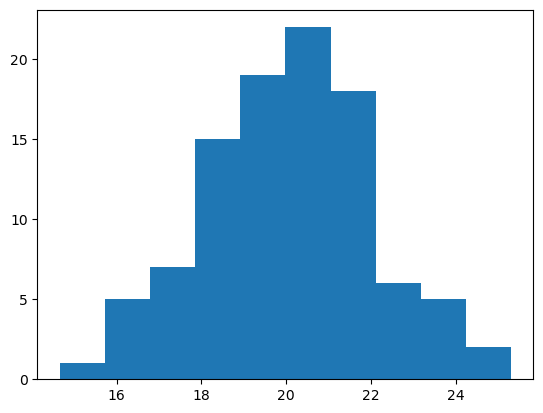

In [9]:
plt.hist(x)

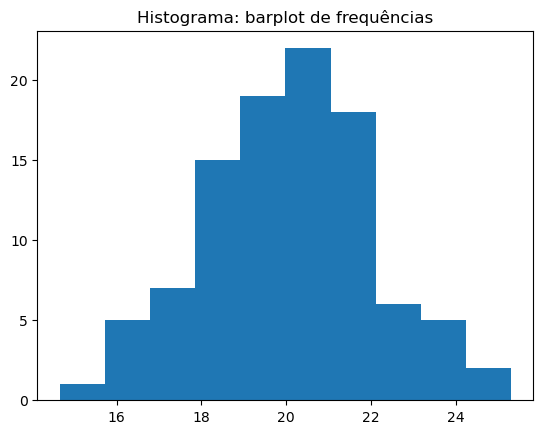

In [10]:
# na distribuição normal: media == mediana == moda
ret = plt.hist(x);
plt.title("Histograma: barplot de frequências");

In [11]:
ret

(array([ 1.,  5.,  7., 15., 19., 22., 18.,  6.,  5.,  2.]),
 array([14.66737341, 15.73063682, 16.79390023, 17.85716364, 18.92042706,
        19.98369047, 21.04695388, 22.11021729, 23.1734807 , 24.23674411,
        25.30000752]),
 <BarContainer object of 10 artists>)

In [12]:
# frequencia
counts = ret[0]

# bins do eixo x ~ posx
posx   = ret[1]
posx   = [np.round((posx[i]+posx[i+1])/2, 1) for i in range(len(posx)-1)]
posx

[np.float64(15.2),
 np.float64(16.3),
 np.float64(17.3),
 np.float64(18.4),
 np.float64(19.5),
 np.float64(20.5),
 np.float64(21.6),
 np.float64(22.6),
 np.float64(23.7),
 np.float64(24.8)]

In [13]:
len(posx), len(counts)

(10, 10)

In [14]:
counts = [int(count) for count in counts]
counts

[1, 5, 7, 15, 19, 22, 18, 6, 5, 2]

In [15]:
# comprehension: tuplica os valores de posx
vals = [ [posx[i]]*counts[i] for i in range(len(posx))]
vals[0:2]

[[np.float64(15.2)],
 [np.float64(16.3),
  np.float64(16.3),
  np.float64(16.3),
  np.float64(16.3),
  np.float64(16.3)]]

In [16]:
def flatten(lista:list) -> list:

    ret_lista = []
    for lista_int in lista:
        if isinstance(lista_int, list):
            lista_int = [float(x) for x in lista_int]
            ret_lista += lista_int
        elif isinstance(lista_int, int) or isinstance(lista_int, float):
            ret_lista += [float(lista_int)]
        else:
            raise ValueError(f"Parte interna da lista é uma lista ou string e não {type(lista_int)} -> '{lista_int}'")

    return ret_lista

In [17]:
vals2 = flatten(vals)
len(vals2), vals2[:10]

(100, [15.2, 16.3, 16.3, 16.3, 16.3, 16.3, 17.3, 17.3, 17.3, 17.3])

### Contador de elementos

In [18]:
from collections import Counter

In [19]:
dic = Counter(vals2)
dic

Counter({20.5: 22,
         19.5: 19,
         21.6: 18,
         18.4: 15,
         17.3: 7,
         22.6: 6,
         16.3: 5,
         23.7: 5,
         24.8: 2,
         15.2: 1})

In [20]:
from statistics import mode

mu = np.mean(vals2)
ssd = np.std(vals2)
med = np.median(vals2)
mod = mode(vals2)

#-- cálculo dos parametros
f"media = {mu:.2f}  median = {med:.2f}  moda = {mod:.2f} e  SSD = {ssd:.2f}"

'media = 20.08  median = 20.50  moda = 20.50 e  SSD = 1.98'

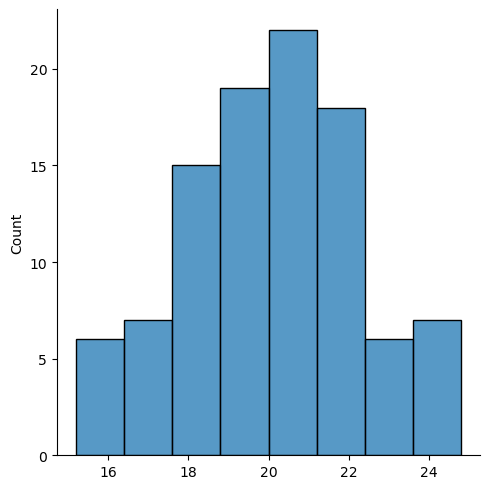

In [21]:
# distplot do seaborn = histograma
ax = sns.displot(vals2)

title = f"Uma distribuição com media = {mu:.2f}  median = {med:.2f}  moda = {mod:.2f} e  SSD = {ssd:.2f}"

ax.set_titles(title)

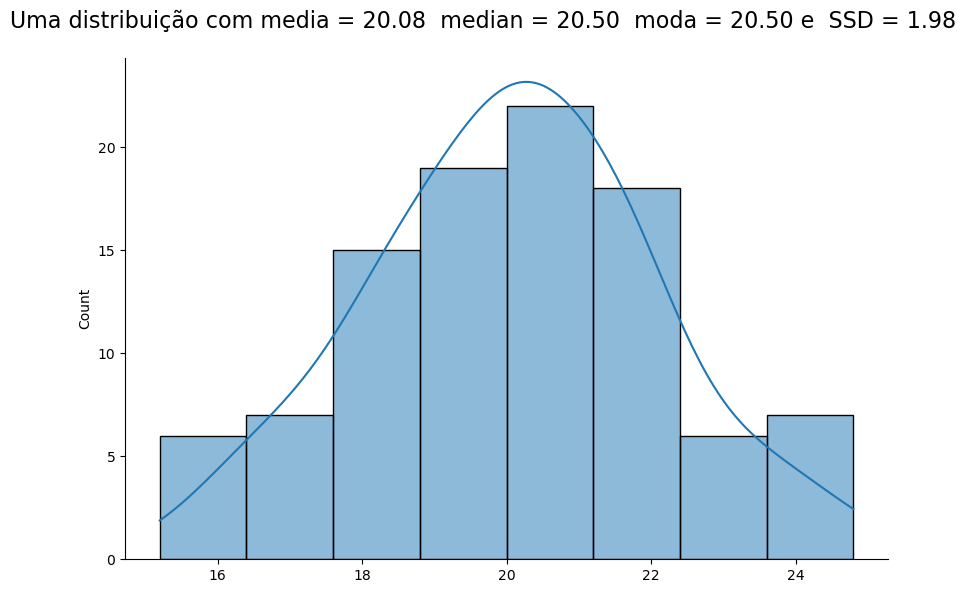

In [22]:
g = sns.displot(vals2, kde=True,
                height=6,     # altura em polegadas
                aspect=1.4    # largura = height × aspect
            )

g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=0.9)

### Mistturando seaborn e matplotlib

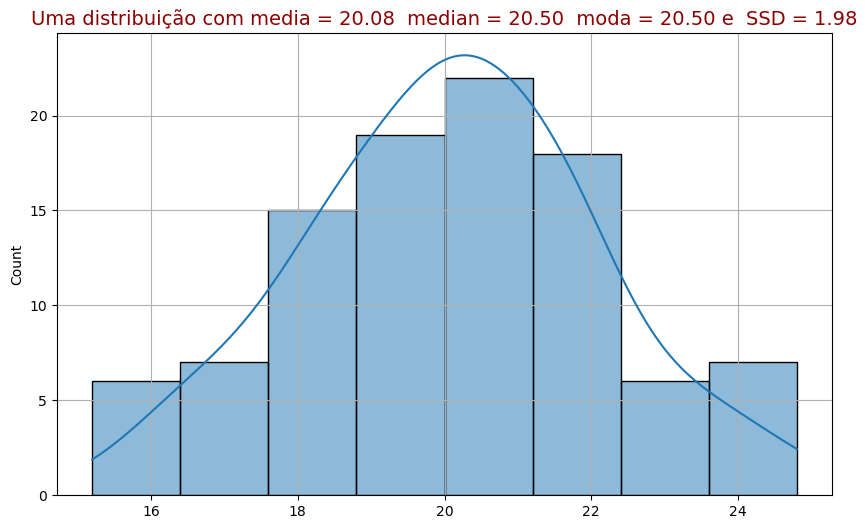

In [23]:
# usando figure(figsize)
plt.figure(figsize=(10, 6))
sns.histplot(vals2, kde=True)
plt.title(title, fontsize=14, color='darkred')
plt.grid();

### Localizando media, mediana, moda

Text(0.5, 1.0, 'Uma distribuição com media = 20.08  median = 20.50  moda = 20.50 e  SSD = 1.98')

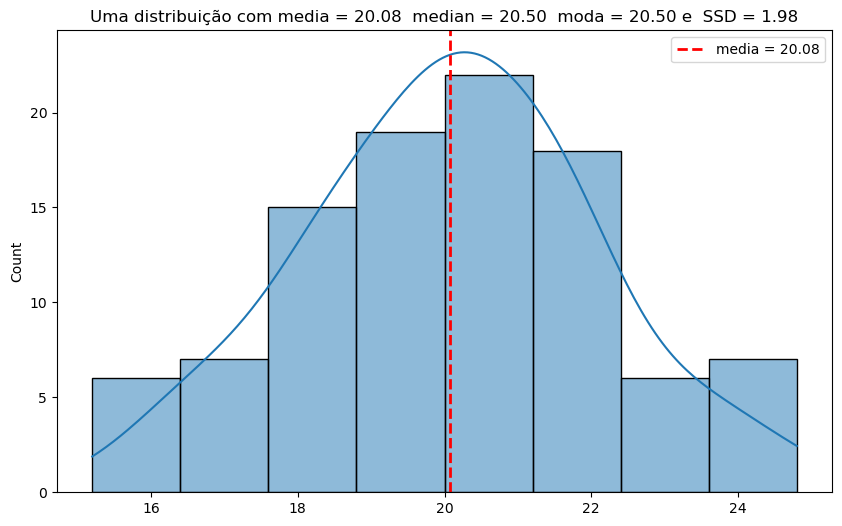

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(vals2, kde=True)

# linha vertical - axvline - com a media em vermelho
# a distribuição é bimodal?
ax.axvline(mu, color="red", linestyle="--",  linewidth=2, label=f"media = {mu:.2f}")

ax.legend()
ax.set_title(title)

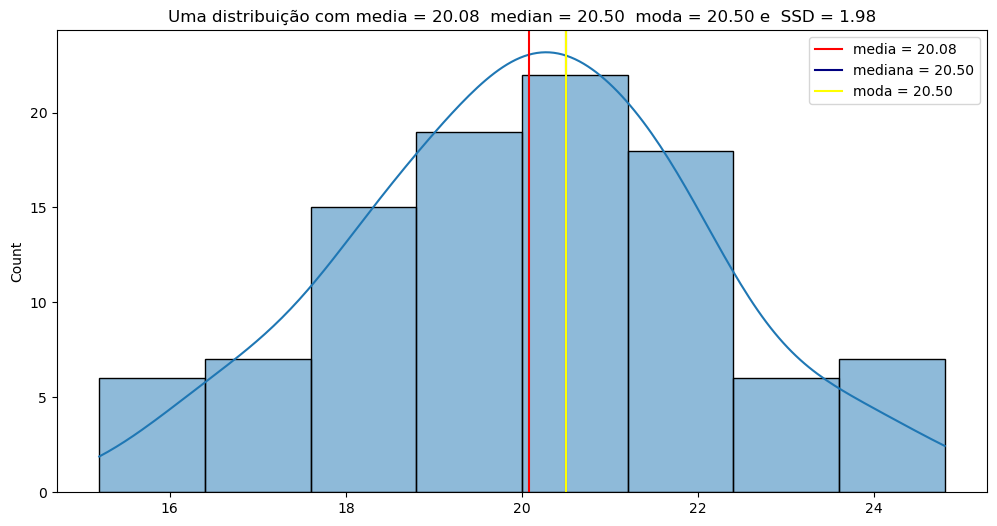

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(vals2, kde=True)

ax.set_title(title)

# linha vertical - axvline - com a media em vermelho, mediana em azul, e a moda em amarelo
ax.axvline(mu, color='red', label=f"media = {mu:.2f}")
ax.axvline(med, color='navy', label=f"mediana = {med:.2f}")
ax.axvline(mod, color='yellow', label=f"moda = {mod:.2f}")

ax.legend()

### Desvio padrão

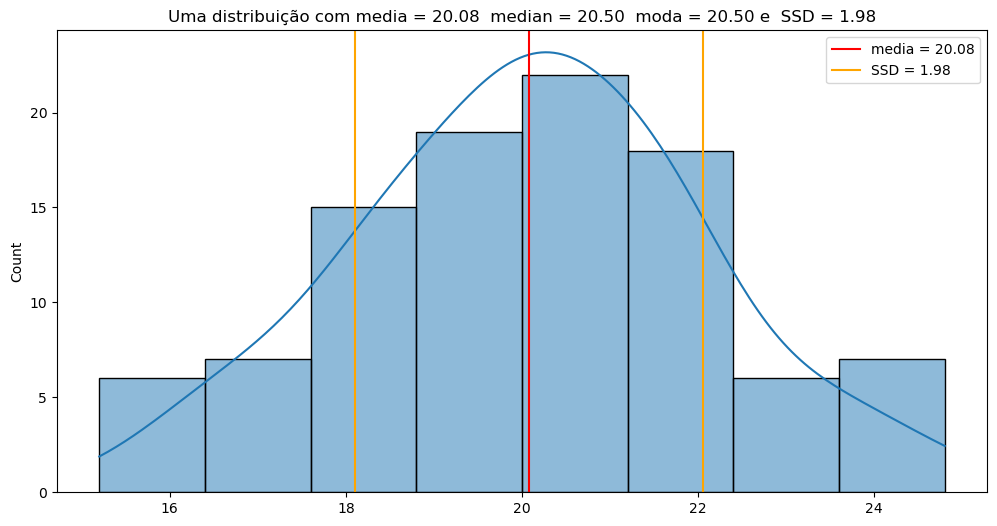

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(vals2, kde=True)

ax.set_title(title)
ax.axvline(mu, color='red', label=f"media = {mu:.2f}")
# qq que seja a distribuição posso obter o desvio padrão, incluso bimodais e assimétricas
ax.axvline(mu-ssd, color='orange', label=f"SSD = {ssd:.2f}")
ax.axvline(mu+ssd, color='orange')

ax.legend()

### Vamos utilizar a tabela das cobras

In [27]:
root_data = '../data/'
os.listdir(root_data)

['circular.txt',
 'osteocytes_lfc.tsv',
 'tab1 - amostras_30_dados_vazia.xlsx',
 'mycars.tsv',
 'stars.txt',
 'exemplo.html',
 'tab0 - calculo estatistico quartis.xlsx',
 'amostras_30_dados.tsv',
 'tab2 - comparando_distribuicoes_tstudent_ant.xlsx',
 'velocities.txt',
 'auto-mpg.names',
 'data.zip',
 'altitude.txt',
 'tab2 - comparando_distribuicoes_tstudent.xlsx',
 'TB_outcomes_2020-09-11.csv',
 'galton_families.csv',
 'auto-mpg.tsv',
 'sunspots.txt',
 'auto-mpg.data',
 'TB_data_dictionary_2020-09-11.csv',
 'osteocytes_exp02.xlsx',
 'database.sqlite',
 'PBMC_NTC Stim 5hr no Blocker_004.fcs',
 'Snake Morphotaxonomy.xlsx',
 'COVID clinical trials.csv',
 'Iris.csv',
 '701bc260-f9ac-11ea-835b-2581c48bf88a.pdf',
 'stm.txt',
 'exemplo_estranho.txt',
 'tab1 - amostras_30_dados.xlsx',
 'cobras_estatistica.tsv',
 'tab0 - calculo estatistico quartis_vazio.xlsx']

In [28]:
[x for x in os.listdir(root_data) if 'Snake' in x]

['Snake Morphotaxonomy.xlsx']

In [29]:
# merge: path + filename via join()
from os.path import join, exists

In [30]:
root_data = '../data/'
fname = 'Snake Morphotaxonomy.xlsx'

filename = join(root_data, fname)
exists(filename), filename

(True, '../data/Snake Morphotaxonomy.xlsx')

In [31]:
try:
    # df = pd.DataFrame()
    df = pd.read_excel(filename)
    print(f"Read df shape {df.shape} -> '{filename}'")
except Exception  as e:
    print(f"#Error {e} - tentando abrir '{filename}'")

Read df shape (240, 9) -> '../data/Snake Morphotaxonomy.xlsx'


In [32]:
# !pip install openpyxl

In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
print(df.shape)
print(list(df.columns))

(240, 9)
['species', 'population', 'sex', 'RDS', 'VS', 'HL', 'TaL', 'temperature', 'elevation']


In [35]:
# cabeçalho: default 5 linhas
df.head()

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894
2,B_jararaca,RJ_serra,Female,23,144,17.0,18.0,23.2,173
3,B_jararaca,RJ_serra,Female,23,144,31.0,51.0,23.2,173
4,B_jararaca,RJ_serra,Female,25,143,30.0,41.0,24.4,59


In [36]:
# cabeçalho: ler 3 linhas
df.head(3)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894
2,B_jararaca,RJ_serra,Female,23,144,17.0,18.0,23.2,173


In [37]:
# rabo - fim da tabela: ler 3 linhas
df.tail(3)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
237,B_new,Colombia,Female,23,146,29.0,43.0,26.0,587
238,B_new,Colombia,Female,23,150,36.0,50.0,22.0,1065
239,B_new,Colombia,Female,23,147,30.0,50.0,21.5,1176


### Colunas
  - species = espécie
  - population = população
  - sex = gênero
  - RDS = Row of Dorsal Scales - qtd de escamas dorsais
  - VS = Ventral Scales - qtd de escamas ventrais
  - HL = comprimento da cabeça
  - TL = comprimento do rabo

In [38]:
df.sex.unique()

array(['Female'], dtype=object)

In [39]:
df.species.unique()

array(['B_jararaca', 'B_terrificus', 'B_new'], dtype=object)

In [40]:
df.population.unique()

array(['RJ_serra', 'RJ_costa', 'Chile_costa', 'Chile_serra',
       'SP_planalto', 'SP_costa', 'Nordeste', 'Centro-oeste', 'Colombia'],
      dtype=object)

### Parâmetros: media (mu) e desvio padrão amostral (SSD) - via pandas
  - df.HL é denominada a Série HL
  - Série em pandas, são os valores de cada coluna

In [41]:
mu = df.HL.mean()
ssd = df.HL.std()
n  = len(df)

f"Há {n} serpentes como HL (comprimento da cabeça) medio = {mu:.2f}  ({ssd:.2f})"

'Há 240 serpentes como HL (comprimento da cabeça) medio = 25.31  (7.45)'

### Parâmetros via numpy

In [42]:
mu = np.mean(df.HL)
ssd = np.std(df.HL)
n  = len(df)

f"Há {n} serpentes como HL (comprimento da cabeça) medio = {mu:.2f}  ({ssd:.2f})"

'Há 240 serpentes como HL (comprimento da cabeça) medio = 25.31  (7.44)'

### Mas, lembre-se que há várias espécies

  - Como consigo fazer uma estatística descritiva por espécie?

In [43]:
# lista na ordem que vai aparecendo
spec_list = df.species.unique()
spec_list

array(['B_jararaca', 'B_terrificus', 'B_new'], dtype=object)

In [44]:
# ordena nos nomes das espécies
spec_list = np.unique(df.species)
spec_list

array(['B_jararaca', 'B_new', 'B_terrificus'], dtype=object)

### Filtrando espécies

In [45]:
# slice = corte nos dados ~   filtro

species = 'B_jararaca'
df_jar = df[df.species == species]

mu_jar = df_jar.HL.mean()
sd_jar = df_jar.HL.std()
n_jar  = len(df_jar)

f"Há {n_jar} serpentes da espécie {species} como HL (comprimento da cabeça) medio = {mu_jar:.2f}  ({sd_jar:.2f})"

'Há 107 serpentes da espécie B_jararaca como HL (comprimento da cabeça) medio = 24.30  (8.21)'

### Podemos criar um método para usar para qualquer medida e qualque espécie

In [46]:
def describe_species_measue(df, species:str='B_jararaca', measure:str='HL'):
    df2 = df[df.species == species].copy()
    df2.reset_index(drop=True, inplace=True)
    
    mu  = df2[measure].mean()
    ssd = df2[measure].std()
    n   = len(df2)
    
    title = f"Há {n} serpentes da espécie {species} como {measure} medio = {mu:.2f}  ({ssd:.2f})"

    return df2, mu, ssd, n, title


In [47]:
measure = 'HL'
species = 'B_terrificus'

df2, mu, ssd, n, title = describe_species_measue(df, species=species, measure=measure)
title

'Há 104 serpentes da espécie B_terrificus como HL medio = 24.26  (6.24)'

In [48]:
df2

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_terrificus,SP_planalto,Female,27,154,32.0,54.0,25.7,17
1,B_terrificus,SP_planalto,Female,25,153,15.0,25.0,25.7,17
2,B_terrificus,SP_planalto,Female,25,155,22.0,32.0,25.7,17
3,B_terrificus,SP_planalto,Female,27,156,31.0,51.0,26.5,36
4,B_terrificus,SP_planalto,Female,25,159,26.0,47.0,26.5,36
...,...,...,...,...,...,...,...,...,...
99,B_terrificus,Centro-oeste,Female,25,155,30.0,48.0,28.0,80
100,B_terrificus,Centro-oeste,Female,25,153,31.0,45.0,28.0,80
101,B_terrificus,Centro-oeste,Female,25,153,33.0,49.0,27.9,81
102,B_terrificus,Centro-oeste,Female,25,149,30.0,46.0,28.0,80


### Todas as especies

In [49]:
for species in spec_list:
    df2, mu, ssd, n, title = describe_species_measue(df, species=species, measure=measure)
    print(title)

Há 107 serpentes da espécie B_jararaca como HL medio = 24.30  (8.21)
Há 29 serpentes da espécie B_new como HL medio = 32.76  (3.12)
Há 104 serpentes da espécie B_terrificus como HL medio = 24.26  (6.24)


### Posso fazer algo mais simples? SIM

In [50]:
df.head(2)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894


#### Colunas

In [51]:
df.columns

Index(['species', 'population', 'sex', 'RDS', 'VS', 'HL', 'TaL', 'temperature',
       'elevation'],
      dtype='object')

### Pegar as colunas numéricas

In [52]:
cols = ['RDS', 'VS', 'HL', 'TaL', 'temperature', 'elevation']

### Filtrar um dataframe com estas colunas

In [53]:
df3 = df[ cols ]
df3.head(2)

,RDS,VS,HL,TaL,temperature,elevation
0,23,144,25.0,34.0,20.3,894
1,23,145,25.0,43.0,20.3,894


In [54]:
df3.describe()

,RDS,VS,HL,TaL,temperature,elevation
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,23.925000,147.116667,25.305375,40.146250,24.801250,355.983333
std,1.186835,9.095664,7.451746,13.287027,2.816783,435.795372
min,21.000000,130.000000,11.000000,12.000000,9.100000,0.000000
25%,23.000000,139.000000,19.000000,26.750000,22.900000,50.000000
50%,23.000000,146.000000,26.000000,43.000000,25.600000,80.000000
75%,25.000000,155.000000,31.000000,51.000000,27.000000,761.000000
max,27.000000,166.000000,44.000000,73.000000,30.000000,1432.000000


In [55]:
df.groupby('species')

In [56]:
from tabulate import tabulate

In [57]:
# !pip install tabulate

In [58]:
dfdesc = df3.describe()
dfdesc

,RDS,VS,HL,TaL,temperature,elevation
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,23.925000,147.116667,25.305375,40.146250,24.801250,355.983333
std,1.186835,9.095664,7.451746,13.287027,2.816783,435.795372
min,21.000000,130.000000,11.000000,12.000000,9.100000,0.000000
25%,23.000000,139.000000,19.000000,26.750000,22.900000,50.000000
50%,23.000000,146.000000,26.000000,43.000000,25.600000,80.000000
75%,25.000000,155.000000,31.000000,51.000000,27.000000,761.000000
max,27.000000,166.000000,44.000000,73.000000,30.000000,1432.000000


In [59]:
for species, dfg in df.groupby('species'):
    df3 = dfg[ cols ]
    print(species)
    print(tabulate(df3.describe(), headers='keys', tablefmt='psql'))
    print("\n")

B_jararaca
+-------+------------+-----------+-----------+----------+---------------+-------------+
|       |        RDS |        VS |        HL |      TaL |   temperature |   elevation |
|-------+------------+-----------+-----------+----------+---------------+-------------|
| count | 107        | 107       | 107       | 107      |     107       |     107     |
| mean  |  23.1869   | 138.879   |  24.2991  |  35.5561 |      23.4505  |     391.533 |
| std   |   0.753994 |   4.26418 |   8.21321 |  13.4519 |       3.01798 |     441.582 |
| min   |  21        | 130       |  13       |  16      |       9.1     |       1     |
| 25%   |  23        | 136       |  17       |  24      |      22.3     |      48     |
| 50%   |  23        | 138       |  22       |  33      |      24.6     |     173     |
| 75%   |  23        | 143       |  32       |  47      |      25.6     |     682     |
| max   |  25        | 149       |  44       |  62.5    |      26.9     |    1432     |
+-------+------------

### Como você faria para analisar a estatística de gêneros?

#### Transformando variável nominal (sexo/genero) em quantitativa
  - Tem algum significado obter estatístca da mesma?

In [60]:
df.head(2)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894


In [61]:
df.sex.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237    False
238    False
239    False
Name: sex, Length: 240, dtype: bool

### Falta dados?

In [62]:
# is not available
dff = df[ ~df.sex.isna() ]
len(df), len(dff)

(240, 240)

In [63]:
df['genero'] = [1 if x=='Female' else 0 for x in df.sex]
df.head(6)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation,genero
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894,1
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894,1
2,B_jararaca,RJ_serra,Female,23,144,17.0,18.0,23.2,173,1
3,B_jararaca,RJ_serra,Female,23,144,31.0,51.0,23.2,173,1
4,B_jararaca,RJ_serra,Female,25,143,30.0,41.0,24.4,59,1
5,B_jararaca,RJ_serra,Female,23,144,21.0,24.0,24.1,41,1


In [64]:
df.genero.unique()

array([1])

### Outra forma

In [65]:
df['genero'] =  df.sex == 'Female'
df.head(6)

,species,population,sex,RDS,VS,HL,TaL,temperature,elevation,genero
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894,True
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894,True
2,B_jararaca,RJ_serra,Female,23,144,17.0,18.0,23.2,173,True
3,B_jararaca,RJ_serra,Female,23,144,31.0,51.0,23.2,173,True
4,B_jararaca,RJ_serra,Female,25,143,30.0,41.0,24.4,59,True
5,B_jararaca,RJ_serra,Female,23,144,21.0,24.0,24.1,41,True


In [66]:
## inclui genero
cols = ['genero', 'RDS', 'VS', 'HL', 'TaL', 'temperature', 'elevation']

In [67]:
# não aceita booleano
for species, dfg in df.groupby('species'):
    df3 = dfg[ cols ]
    print(species)
    print(tabulate(df3.describe(), headers='keys', tablefmt='psql'))
    print("\n")

B_jararaca
+-------+------------+-----------+-----------+----------+---------------+-------------+
|       |        RDS |        VS |        HL |      TaL |   temperature |   elevation |
|-------+------------+-----------+-----------+----------+---------------+-------------|
| count | 107        | 107       | 107       | 107      |     107       |     107     |
| mean  |  23.1869   | 138.879   |  24.2991  |  35.5561 |      23.4505  |     391.533 |
| std   |   0.753994 |   4.26418 |   8.21321 |  13.4519 |       3.01798 |     441.582 |
| min   |  21        | 130       |  13       |  16      |       9.1     |       1     |
| 25%   |  23        | 136       |  17       |  24      |      22.3     |      48     |
| 50%   |  23        | 138       |  22       |  33      |      24.6     |     173     |
| 75%   |  23        | 143       |  32       |  47      |      25.6     |     682     |
| max   |  25        | 149       |  44       |  62.5    |      26.9     |    1432     |
+-------+------------

### Há diferenças entre populações

In [68]:
df.population.unique()

array(['RJ_serra', 'RJ_costa', 'Chile_costa', 'Chile_serra',
       'SP_planalto', 'SP_costa', 'Nordeste', 'Centro-oeste', 'Colombia'],
      dtype=object)

### Discuta a media e desvio padrão das espécies